In [1]:
import numpy as np
import pandas as pd

Read the Dataset

In [2]:
df = pd.read_csv('Fraud.csv')
df.shape

(6362620, 11)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Exploratory Data Analysis

Checking for Null values in the Data

In [6]:
df.isnull().values.any()

False

Checking the information about Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


From the above two columns of data we can see that there are no null values.

In [8]:
genuine = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
genuine_percent = (genuine / (fraud + genuine)) * 100
fraud_percent = (fraud / (fraud + genuine)) * 100

print("Number of GENUINE transactions: ", genuine)
print("Number of FRAUD transactions: ", fraud)
print("Percentage of GENUINE transactions: {:.4f} %".format(genuine_percent))
print("Percentage of FRAUD transactions: {:.4f} %".format(fraud_percent))

Number of GENUINE transactions:  6354407
Number of FRAUD transactions:  8213
Percentage of GENUINE transactions: 99.8709 %
Percentage of FRAUD transactions: 0.1291 %


As per the data and the output generated in the above cell, it shows that the data is highly imbalanced dataset. The percentage of genuine transactions is 99.87% and the percentage of fraud transactions is just 0.1291%. 

# Data Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Pie chart showing the percentage of genuine and fraud transactions

0    6354407
1       8213
Name: isFraud, dtype: int64


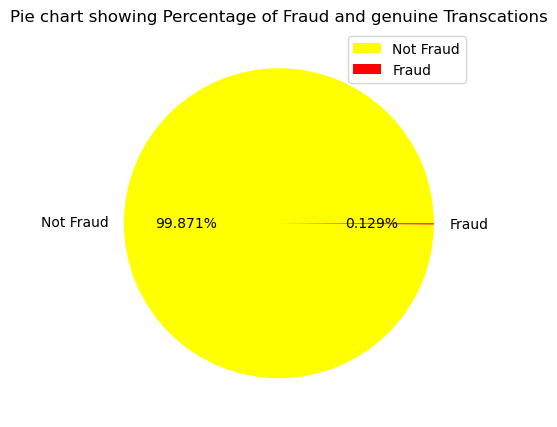

In [10]:
print(df.isFraud.value_counts())
colors = sns.color_palette('flare')
plt.rcParams['figure.figsize'] = (5, 8)
plt.pie(df.isFraud.value_counts(), labels=['Not Fraud','Fraud'],colors=['yellow','red'], autopct='%.3f%%')
plt.legend(loc="upper right")
plt.title('Pie chart showing Percentage of Fraud and genuine Transcations')
plt.show()

#### Correlation Heat Map

C:\Users\rjgop\AppData\Local\Temp\ipykernel_3572\934835600.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

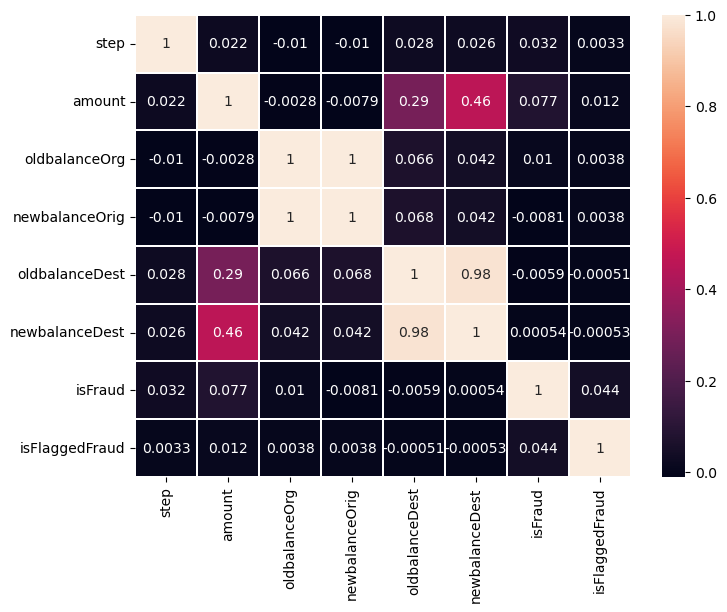

In [11]:
corr=df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, linewidths=0.2)

#### Bar graph showing number of genuine transactions and fraud transactions

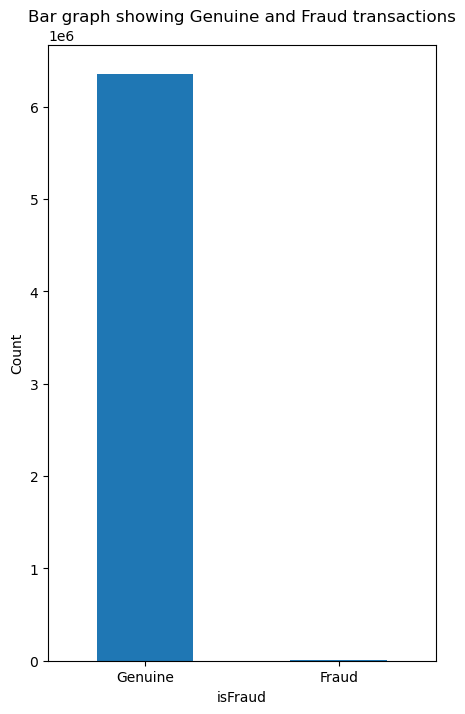

In [12]:
plt.figure(figsize=(5,8))
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Bar graph showing Genuine and Fraud transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

#### Pie Chart Showing all types of transactions used in the dataset.

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


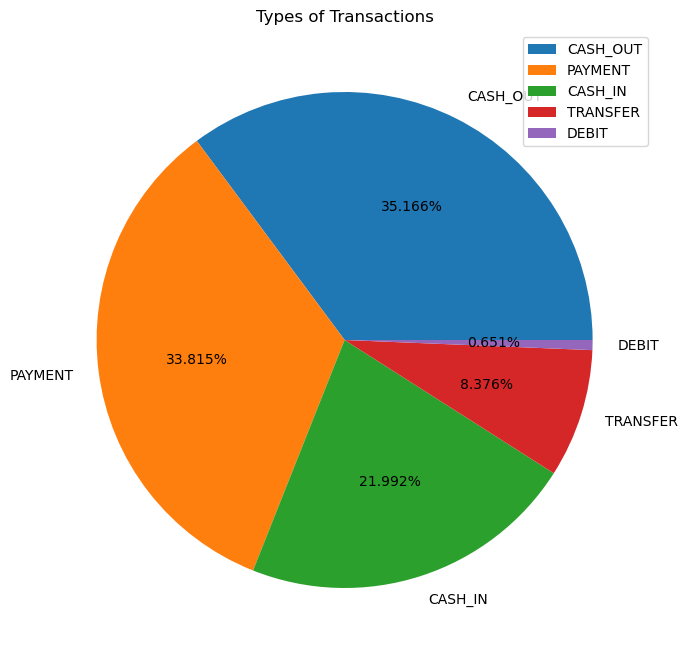

In [13]:
print(df.type.value_counts())

colors = sns.color_palette('flare')
plt.rcParams['figure.figsize'] = (8, 10)
plt.pie(df.type.value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], autopct='%.3f%%')
plt.legend(loc="upper right")
plt.title('Types of Transactions')
plt.show()

From the above we can clearly see the percentages of payment methods used for transactions. The highest is the CASH_OUT with 35.16% and the least used is the DEBIT with 0.651%.

## Encoding

Creating a copy of dataset

In [14]:
final_df = df.copy()
final_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Checking the dataset for how many are dtype

In [15]:
objList = final_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


There are THREE attributes with object dataype. We have to use Label encoding to check multicollinearity.

### Label Encoding 

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for vv in objList:
    final_df[vv] = label.fit_transform(final_df[vv].astype(str))

print (final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [17]:
final_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


### MultiColinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(final_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that "oldbalanceOrg" and "newbalanceOrig" is having too high VIF thus they are highly correlated. Similarly, "oldbalanceDest" and "newbalanceDest" are also having a high VIF. Also nameDest is connected to nameOrig. Thus we can combine these pairs of collinear attributes and drop the individual ones.

In [19]:
final_df['Actual_amount_orig'] = final_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
final_df['Actual_amount_dest'] = final_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
final_df['TransactionPath'] = final_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

final_df = final_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(final_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

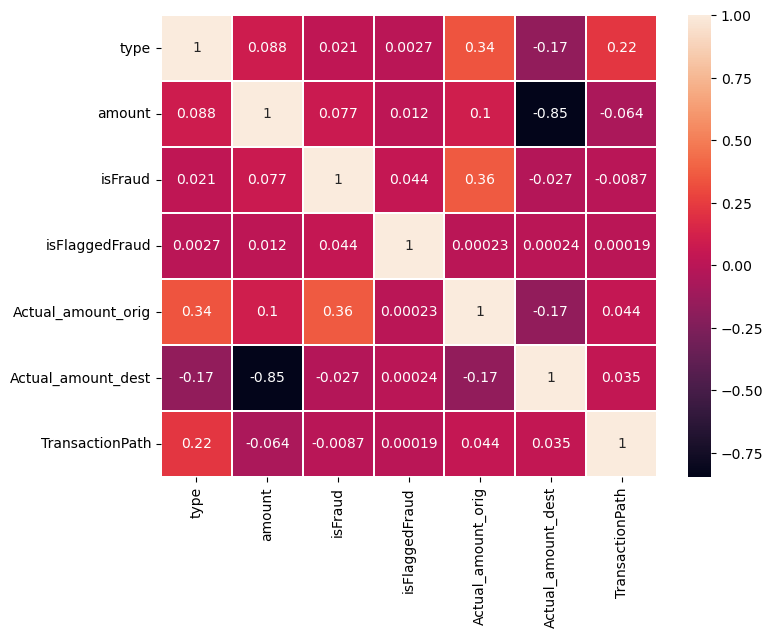

In [20]:
corr=final_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True, linewidths=0.2)

## Machine Learnig Models

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Normalize Data

In [22]:
scaler = StandardScaler()
final_df["NormalizedAmount"] = scaler.fit_transform(final_df["amount"].values.reshape(-1, 1))
final_df.drop(["amount"], inplace= True, axis= 1)

Y = final_df["isFraud"]
X = final_df.drop(["isFraud"], axis= 1)

### Split Data

In [23]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### Model 

Decision Tree 

In [24]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

### Evaluation

In [ ]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

In [ ]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

In [ ]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)



confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

In [ ]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)



classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

### Conclusion

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Genuine to be left off.